## Final Project | Statistical Learning
Authors: Nariman Kassymkhanov & Otankhan Maikenov

In [6]:
# importing necessary libraries and tools
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import random
from math import log
import math
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

### Generated Data

In [38]:
# decision tree function
def tree(m,d):
    # generating dataset based on sample size m and dimension d
    X, y = make_classification(n_samples = m, n_features = d, random_state = 2)
    # splitting the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)
    # fitting the data into decision tree
    dt = DecisionTreeClassifier(max_depth = 5)
    dt.fit(X_train, y_train)
    # calculating training and true errors
    train = 1 - round(dt.score(X_train, y_train), 3)
    test = 1 - round(dt.score(X_test, y_test), 3)
    
    return train, test, dt.tree_.node_count

In [39]:
# storing different values of sample size
m = np.array([])
for i in range(50, 10000, 300):
    m = np.append(m, i)
m = m.astype(int)

# storing different values of dimension
d = np.array([])
for i in range(5, 50):
    d = np.append(d, i)
d = d.astype(int)

In [43]:
# defining the array of train and true erros and the expression for each cases
train_error_m = np.array([])
test_error_m = np.array([])
f_m = np.array([])

train_error_d = np.array([])
test_error_d = np.array([])
f_d = np.array([])

a = 0.1     # sigma in the expression

# For fixed d = 5
for i in range(0,len(m)):
    train, test, n = tree(m[i], 5)
    train_error_m = np.append(train, train_error_m)
    test_error_m = np.append(test, test_error_m)
    # calculating the expression value
    f = (((n+1)*math.log(5+3)/log(2)+log(2/a))/(2*m[i]))**(1/2)
    f_m = np.append(f_m, f)
    
# For fixed m = 1000
for j in range(0,len(d)):
    train, test, n = tree(1000, d[j])
    train_error_d = np.append(train, train_error_d)
    test_error_d = np.append( test, test_error_d)
    # calculating the expression value
    f = (((n+1)*math.log(d[j]+3)/log(2)+log(2/a))/(2*300))**(1/2)
    f_d = np.append(f_d, f)

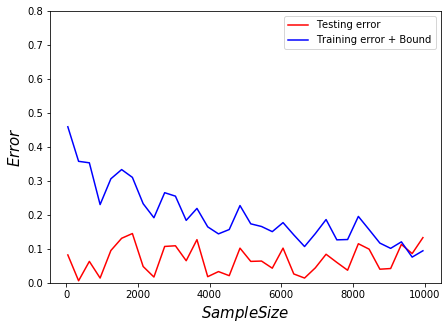

In [44]:
# plotting values of errors vs. sample size
plt.plot(m, (test_error_m ), color = 'r', label = "Testing error")
plt.plot(m,f_m+train_error_m, color = 'b', label = "Training error + Bound")
plt.xlabel('$Sample Size$', fontsize = 15) 
plt.ylabel('$Error$', fontsize = 15)
plt.ylim(0, 0.8)
plt.legend()

fig = plt.gcf()
fig.set_size_inches(7, 5)
plt.show()

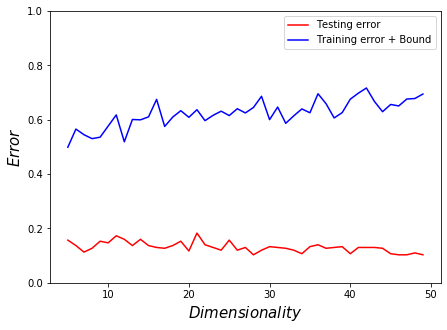

In [45]:
# plotting values of errors vs. dimension
plt.plot(d, (test_error_d ), color = 'r', label = "Testing error")
plt.plot(d,f_d+train_error_d, color = 'b', label = "Training error + Bound")
plt.xlabel('$Dimensionality$', fontsize = 15) 
plt.ylabel('$Error$', fontsize = 15)
plt.ylim(0, 1)
plt.legend()

fig = plt.gcf()
fig.set_size_inches(7, 5)
plt.show()

### Real Data

In [55]:
def tree_data(m,d):
    # loading the breast cancer data
    bc = load_breast_cancer()
    # slicing the data by dimensions given by sample size and dimension
    X_bc = bc.data[:m, :d]
    y_bc = bc.target[:m]
    # fitting the data into decision tree
    X_train, X_test, y_train, y_test = train_test_split(X_bc, y_bc, test_size = .3, random_state=42)
    dt = DecisionTreeClassifier(max_depth = 5)
    dt.fit(X_train, y_train)
    
    # returning the train and true errors with number of nodes
    return round(dt.score(X_train, y_train), 3), round(dt.score(X_test, y_test), 3), dt.tree_.node_count

In [69]:
# storing different values of sample size
m = np.array([])
for i in range(50, 550, 10):
    m = np.append(m, i)
m = m.astype(int)

# storing different values of dimension
d = np.array([])
for i in range(2, 30):
    d = np.append(d, i)
d = d.astype(int)

In [70]:
# storing train and true errors and exxpression values in arrays
train_error_m = np.array([])
test_error_m = np.array([])
f_m = np.array([])

train_error_d = np.array([])
test_error_d = np.array([])
f_d = np.array([])

a = 0.1     # sigma in the expression

# for fixed d = 15
for i in range(0,len(m)):
    train, test, n = tree_data(m[i], 15)
    train_error_m = np.append(1 - train, train_error_m)
    test_error_m = np.append(1 - test, test_error_m)
    # calculating the expression value
    f = (((n+1)*math.log(15+3)/log(2)+log(2/a))/(2*m[i]))**(1/2)
    f_m = np.append(f_m, f)
    
# for fixed m = 300
for j in range(0,len(d)):
    train, test, n = tree_data(300, d[j])
    train_error_d = np.append(1 - train, train_error_d)
    test_error_d = np.append(1 - test, test_error_d)
    # calculating the expression value
    f = (((n+1)*math.log(d[j]+3)/log(2)+log(2/a))/(2*300))**(1/2)
    f_d = np.append(f_d, f)

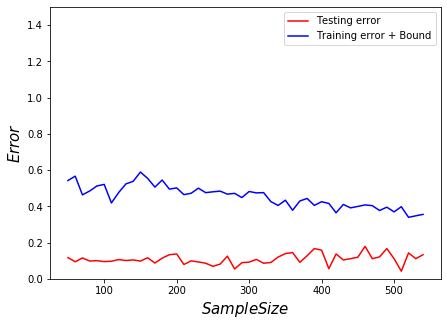

In [71]:
# plotting values of errors vs. sample size
plt.plot(m, (test_error_m ), color = 'r', label = "Testing error")
plt.plot(m,f_m+train_error_m, color = 'b', label = "Training error + Bound")
plt.xlabel('$Sample Size$', fontsize = 15) 
plt.ylabel('$Error$', fontsize = 15)
plt.ylim(0, 1.5)
plt.legend()

fig = plt.gcf()
fig.set_size_inches(7, 5)
plt.show()

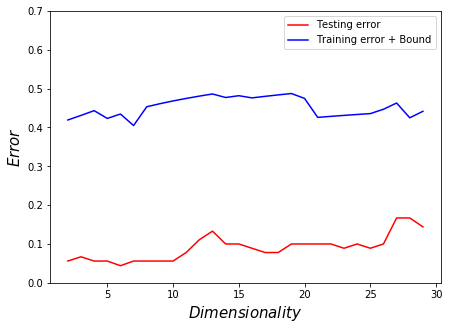

In [73]:
# plotting values of errors vs. dimension
plt.plot(d, (test_error_d ), color = 'r', label = "Testing error")
plt.plot(d,f_d+train_error_d, color = 'b', label = "Training error + Bound")
plt.xlabel('$Dimensionality$', fontsize = 15) 
plt.ylabel('$Error$', fontsize = 15)
plt.ylim(0, 0.7)
plt.legend()

fig = plt.gcf()
fig.set_size_inches(7, 5)
plt.show()